In [1]:
import requests
from bs4 import BeautifulSoup
from csv import writer
import datetime

In [2]:
# extract Data from URL

url = "https://www.bookdepository.com/search?searchTerm=data%20science&search=Find+book"
response = requests.get(url)
response

<Response [200]>

In [4]:
soup = BeautifulSoup(response.content , "html.parser")
soup

In [5]:
products = soup.find_all("div" , class_="book-item")
products

[<div class="book-item" itemscope="" itemtype="http://schema.org/Book">
 <div class="item-img">
 <a href="/R-for-Data-Science-Garrett-Wickham/9781491910399?ref=grid-view&amp;qid=1661095330218&amp;sr=1-1">
 <img alt="R for Data Science" class="lazy" data-lazy="https://d1w7fb2mkkr3kw.cloudfront.net/assets/images/book/mid/9781/4919/9781491910399.jpg"/>
 </a>
 </div>
 <meta content="9781491910399" itemprop="isbn"/>
 <meta content="R for Data Science" itemprop="name"/>
 <div class="item-info">
 <h3 class="title">
 <a href="/R-for-Data-Science-Garrett-Wickham/9781491910399?ref=grid-view&amp;qid=1661095330218&amp;sr=1-1">
             R for Data Science</a>
 </h3>
 <p class="author">
 <span itemprop="author" itemscope="Garrett Wickham" itemtype="http://schema.org/Person">
 <a href="/author/Garrett-Wickham" itemprop="url">
 <span itemprop="name">Garrett Wickham</span>
 </a>
 </span>
 </p>
 <div class="rating-wrap">
 <a aria-label="Ratings for R for Data Science" href="/R-for-Data-Science-Garre

In [24]:
for product in products:
    
    M_Name = product.find("h3" , class_="title").a.text.strip()
    
    author = product.find("p" , class_='author').span.a.text
    
    M_Date = product.find("p" , class_="published").text.strip()
    
    M_T_Date = datetime.date.today()
    
    M_Prices = product.find("p" , class_="price").span.text.strip()    
    M_Price = M_Prices[3:]
    
#     print(M_Name , author, M_Date , M_T_Date , M_Price)

R for Data Science 
Garrett Wickham
 31 Jan 2017 2022-08-21 1,640.5
Data Science 
John D. Kelleher
 30 May 2018 2022-08-21 889.75
Python Data Science Handbook 
Jake Vanderplas
 03 Jan 2017 2022-08-21 2,403.73
Data Science for Business: What You Need to Know About Data Mining and Data-Analytic Thinking 
Foster Provost
 01 Aug 2015 2022-08-21 1,618.88
Data Science from Scratch 
Joel Grus
 01 Jun 2019 2022-08-21 1,818.81
Data Smart - Using Data Science to Transform Information into Insight 
JW Foreman
 22 Nov 2013 2022-08-21 1,697.89
Doing Data Science 
Rachel Schutt
 19 Nov 2013 2022-08-21 1,744.73
Practical Data Science with R 
Nina Zumel
 13 Apr 2014 2022-08-21 1,923.81
Data Science and Big Data Analytics 
EMC Education Services
 17 Mar 2015 2022-08-21 2,297.64
Numsense! Data Science for the Layman 
Kenneth Soo
 24 Mar 2017 2022-08-21 1,370.14
The Data Science Design Manual 
Professor Steven S. Skiena
 29 Aug 2017 2022-08-21 2,614.37
Cracking the Data Science Interview 
Maverick Lin
 1

In [32]:
# Extract Data From Inner Page
import requests
from bs4 import BeautifulSoup
from csv import writer
import datetime


# extract Data from URL
pages = 5

for page in range(pages):
    
    url = f"https://www.bookdepository.com/search?searchTerm=data%20science&page={page}"
    response = requests.get(url)
    # response


    soup = BeautifulSoup(response.content , "html.parser")
    # soup

    products = soup.find_all("div" , class_="book-item")
    # products
    
    with open("Data_science_Books.csv" , "w" , encoding= "utf-8") as csv_file:
        ai_writer = writer(csv_file)
        headers = ["Name" , "author" , "M_Date" , "To_day" , "price"]
        ai_writer.writerow(headers)

        for product in products:

            M_Name = product.find("h3" , class_="title").a.text.strip()

            author = product.find("p" , class_='author').span.a.text.strip()

            M_Date = product.find("p" , class_="published").text.strip()

            M_T_Date = datetime.date.today()

            M_Prices = product.find("p" , class_="price").span.text.strip()    
            M_Price = M_Prices[3:]

            list = [M_Name , author , M_Date , M_T_Date , M_Price]
            ai_writer.writerow(list)
#             print(M_Name , author, M_Date , M_T_Date , M_Price)

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("Data_science_Books.csv")

In [34]:
df

,Name,author,M_Date,To_day,price
0,Data Science for Economics and Finance,Sergio Consoli,14 Jul 2021,2022-08-21,"1,802.58"
1,Model-Based Clustering and Classification for ...,Charles Bouveyron,31 Aug 2019,2022-08-21,"2,991.92"
2,Beginning Data Science with Python and Jupyter,Alex Galea,05 Jun 2018,2022-08-21,"1,320.78"
3,Productive and Efficient Data Science with Python,Tirthajyoti Sarkar,27 Jul 2022,2022-08-21,"1,662.97"
4,Data Science at Scale with Python and Dask,Jesse Daniel,11 Oct 2019,2022-08-21,"1,551"


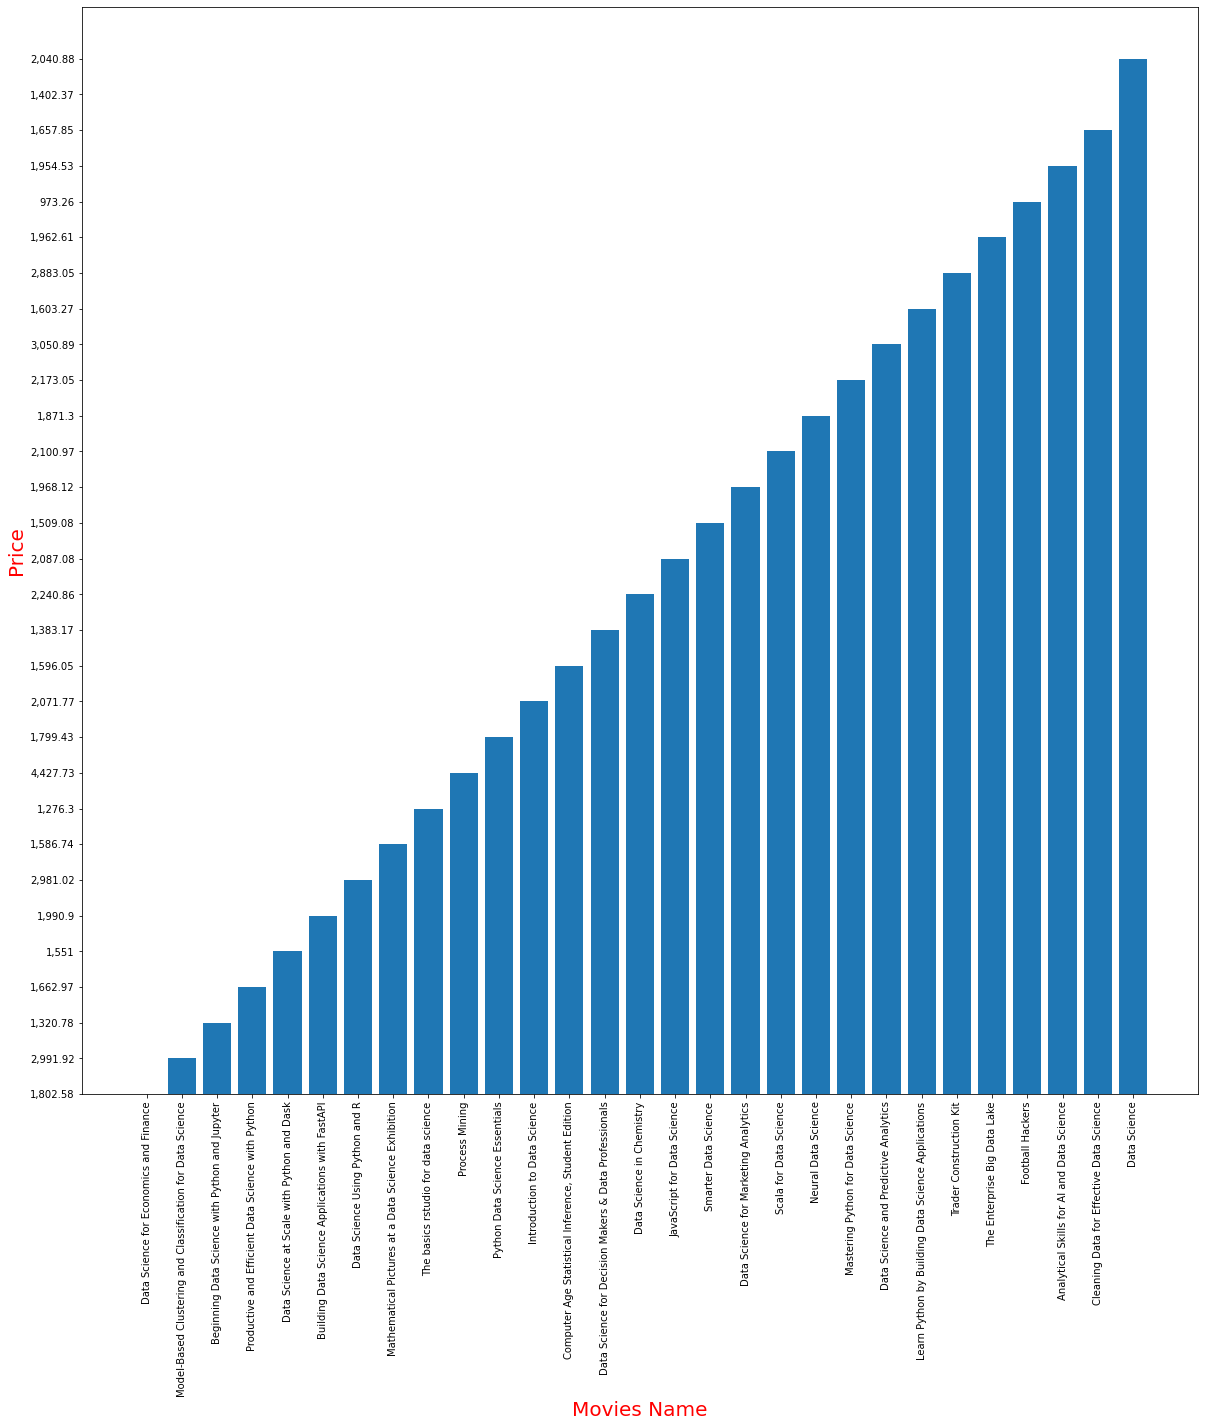

In [75]:
plt.bar(x= "Name" , height="price" , data=df )
plt.xticks(rotation= 90)
plt.set_figsize = (50 , 50)
plt.xlabel("Movies Name" , c= "r" , fontsize= 20)
plt.ylabel("Price" , c= "r" , fontsize= 20)
plt.show();